# Face Recognition and DeepFace

**Requirements**

* Cmake -> pip install cmake
* dlib -> conda install -c conda-forge dlib
* face_recognition -> pip install face_recognition
* Deepface -> pip install deepface

In [1]:
import face_recognition
import PIL.Image
import PIL.ImageDraw
import matplotlib.pyplot as plt
import cv2
import numpy as np

from deepface import DeepFace

Using TensorFlow backend.


Directory  C:\Users\dreve /.deepface created
Directory  C:\Users\dreve /.deepface/weights created


# 1. Face_recognition

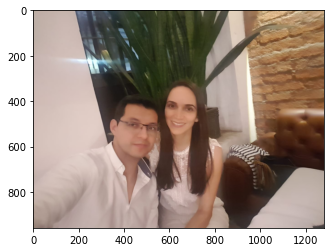

In [4]:
# Load image
image = face_recognition.load_image_file("foto1.jpg")
plt.imshow(image)
plt.show()

## Face recognition and face locations

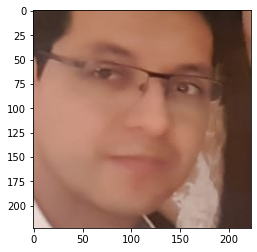

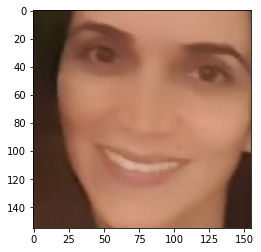

In [5]:
# Face location
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:
    crop_img = image[face_location[0]:face_location[2],face_location[3]:face_location[1]]
    plt.imshow(crop_img)
    plt.show()

## Landmarks

In [6]:
# Found landmarks
face_landmarks = face_recognition.face_landmarks(image)
print(face_landmarks)

[{'chin': [(351, 479), (354, 511), (355, 542), (358, 571), (370, 596), (390, 617), (414, 633), (440, 646), (464, 653), (484, 650), (500, 638), (514, 622), (526, 603), (533, 583), (539, 562), (543, 540), (545, 518)], 'left_eyebrow': [(399, 481), (418, 473), (439, 472), (459, 479), (475, 491)], 'right_eyebrow': [(505, 499), (517, 494), (530, 494), (542, 496), (548, 505)], 'nose_bridge': [(490, 510), (491, 525), (493, 541), (494, 557)], 'nose_tip': [(464, 564), (474, 569), (485, 574), (494, 572), (501, 569)], 'left_eye': [(419, 501), (433, 500), (446, 502), (457, 509), (444, 510), (431, 508)], 'right_eye': [(499, 518), (513, 514), (525, 516), (533, 522), (523, 525), (511, 523)], 'top_lip': [(438, 589), (459, 587), (474, 586), (482, 589), (490, 588), (497, 592), (502, 599), (497, 598), (488, 595), (481, 595), (473, 593), (445, 590)], 'bottom_lip': [(502, 599), (494, 605), (485, 607), (477, 606), (469, 604), (455, 600), (438, 589), (445, 590), (472, 594), (480, 595), (487, 595), (497, 598)]

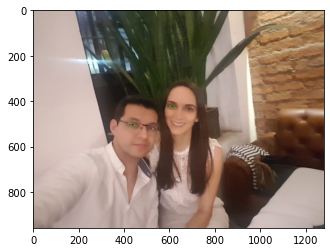

In [7]:
# Drawing Landmarks by features
for face_landmark in face_landmarks:
    landmark = face_landmark.get('left_eye')
    for loc in landmark:
        x,y = loc
        #print(x,y)
        cv2.circle(image,(x, y), 2, (0,255,0), -1)

plt.imshow(image)
plt.show()

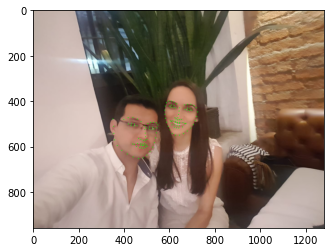

In [9]:
# Drawing all Landmarks
for face_landmark in face_landmarks:
    for feature in face_landmark:
        #print(feature)
        landmark = face_landmark.get(feature)
        for location in landmark:
            x,y = location
            cv2.circle(image,(x, y), 2, (0,255,0), -1)

plt.imshow(image)
plt.show()
    

## Real Time Landmarks Detection

In [ ]:
camera = cv2.VideoCapture(0)

while(True):

    _, frame = camera.read()

    face_landmarks = face_recognition.face_landmarks(frame,model='large')
    faces = face_recognition.face_locations(frame)
    
    for face in faces:
        cv2.rectangle(frame,(face[3],face[2]),(face[1], face[0]),(255,2,2),3)
        
    if face_landmarks:    
        for face_landmark in face_landmarks:
            landmark = face_landmark
            for feature in landmark:
                landmark = face_landmark.get(feature)
                for location in landmark:
                    x,y = location
                    cv2.circle(frame,(x, y), 2, (0,255,0), -1)

    cv2.imshow("Test out", frame)
    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

In [ ]:
camera.release()

## Face Encoding - Real Time

In [ ]:
# Load and encoding an image
image = face_recognition.load_image_file("OneDrive/Fotos/foto.png")
David_encoding = face_recognition.face_encodings(image)[0]
Myface_encodings = [David_encoding]
Myface_names = ["DAVID"]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
f_resize = 6

# Take capture of camera
camera = cv2.VideoCapture(0)

while True:
    # Take a single frame of video
    _, frame = camera.read()

    # Resize frame of video 
    frame_resized = cv2.resize(frame, (0, 0), fx=1/f_resize, fy=1/f_resize)
    #frame_resized = cv2.cvtColor(frame_resized,cv2.COLOR_BGR2RGB)

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(frame_resized)
    face_encodings = face_recognition.face_encodings(frame_resized, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(Myface_encodings, face_encoding)
        name = "Unknown"

        face_distances = face_recognition.face_distance(Myface_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = Myface_names[best_match_index]
            face_names.append(name)

    
    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):

        top *= f_resize
        bottom *= f_resize
        left *=f_resize
        right *= f_resize
        
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (255, 0, 0), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 30), (right, bottom), (255, 0, 0), cv2.FILLED)
        cv2.putText(frame, name, (left + 5, bottom - 5), cv2.FONT_HERSHEY_DUPLEX, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    key = cv2.waitKey(1)
    
    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

# 2. Deepface

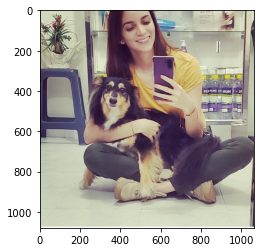

In [33]:
# Load image
image = cv2.imread("OneDrive/Fotos/foto4.jpg")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

# Make some predictions


In [19]:
# Prediction of emotion, gender, age, race
results = DeepFace.analyze(image)
print(results["age"]," years old ",results["dominant_race"]," ",results["dominant_emotion"]," ", results["gender"])

ResourceExhaustedError: OOM when allocating tensor with shape[7,7,512,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Add] name: conv2d_96/random_uniform/

In [4]:
print(results)

{'emotion': {'angry': 0.007812262629158795, 'disgust': 9.323291294549563e-06, 'fear': 0.010619671957101673, 'happy': 98.89405369758606, 'sad': 0.023103014973457903, 'surprise': 0.00024467426555929706, 'neutral': 1.0641565546393394}, 'dominant_emotion': 'happy', 'age': '24', 'gender': 'Woman', 'race': {'asian': 0.006314616997619614, 'indian': 0.013115323290117728, 'black': 6.610363069027475e-05, 'white': 93.86705123585767, 'middle eastern': 4.993279948430058, 'latino hispanic': 1.1201763261959747}, 'dominant_race': 'white'}


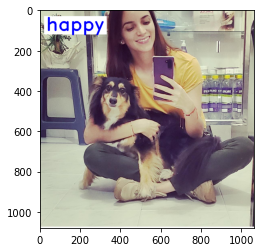

In [34]:
cv2.rectangle(image, (20, 30), (330, 120), (255, 255, 255), cv2.FILLED)
cv2.putText(image, results['dominant_emotion'], (30,100), cv2.FONT_HERSHEY_DUPLEX, 3.0, (255, 0, 0), 5)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

## Real-Time Emotion Recognition

In [ ]:
# Take capture of camera
camera = cv2.VideoCapture(0)
f_resize = 6
while True:
    # Take a single frame of video
    _, frame = camera.read()

    # Resize frame of video 
    frame_resized = cv2.resize(frame, (0, 0), fx=1/f_resize, fy=1/f_resize)
    #frame_resized = cv2.cvtColor(frame_resized,cv2.COLOR_BGR2RGB)
    
    results = DeepFace.analyze(frame_resized, actions = ['emotion'])
    cv2.putText(frame, results['dominant_emotion'], (60,60), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)
    
    # Display the resulting image
    cv2.imshow('Video', frame)

    key = cv2.waitKey(1)
    
    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

In [ ]:
camera.release()